<a href="https://colab.research.google.com/github/Ki-Geek/Credit_Card_fraud_ML/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Details on Dataset

In [85]:
import numpy as np

In [86]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [87]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [90]:
df.isnull().sum().max()

0

In [91]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [92]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [93]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

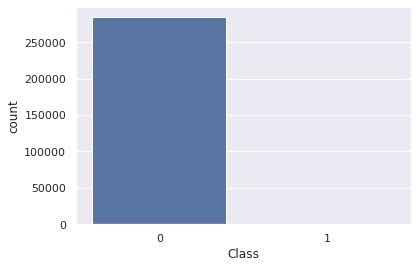

In [94]:
import seaborn as sns
sns.countplot(x="Class", data=df)

In [95]:
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64


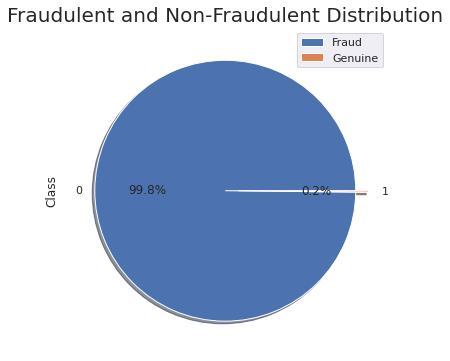

In [96]:
import matplotlib.pyplot as plt
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


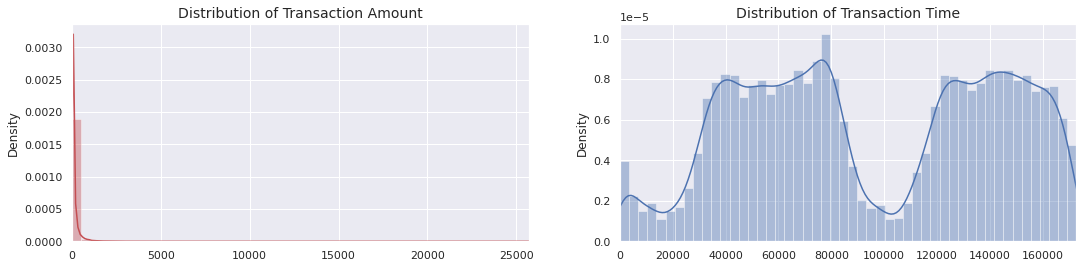

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [98]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


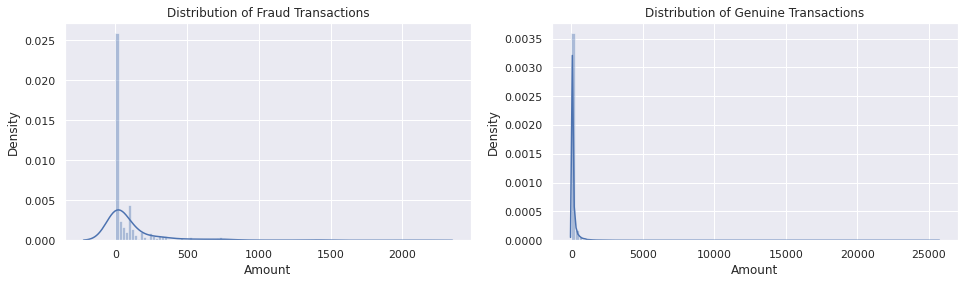

In [99]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [100]:
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [101]:
print("Genuine Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min())

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: Amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


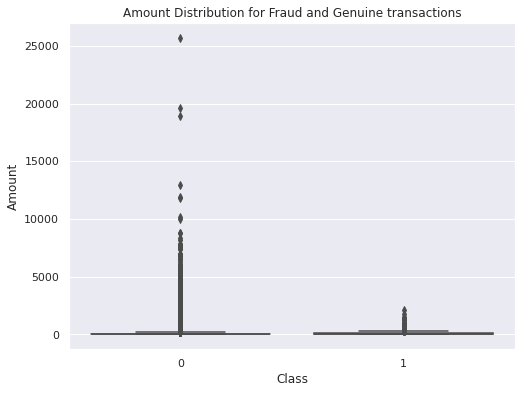

In [102]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

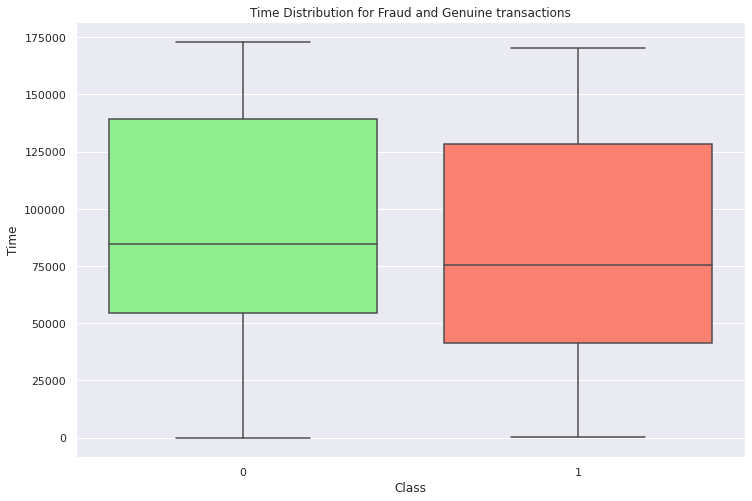

In [103]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Class', y='Time',data = df)

# Change the appearance of that box
ax.artists[0].set_facecolor('#90EE90')
ax.artists[1].set_facecolor('#FA8072')

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

In [104]:
# Finging unique values for each column
df[['Time','Amount','Class']].nunique()

Time      124592
Amount     32767
Class          2
dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation')

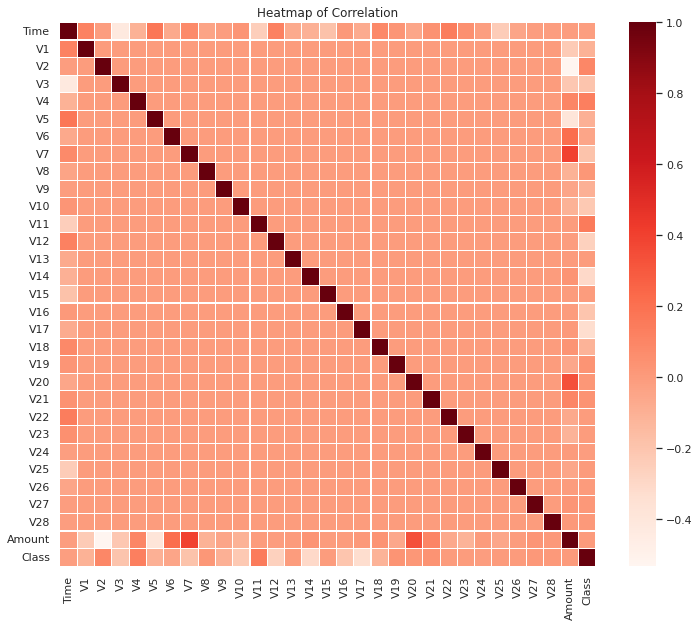

In [105]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.title('Heatmap of Correlation')

In [106]:
#Top Five Features
x = corr['Class'].abs().sort_values(ascending = False).to_frame().query('Class < 1')
x.iloc[0:5]

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

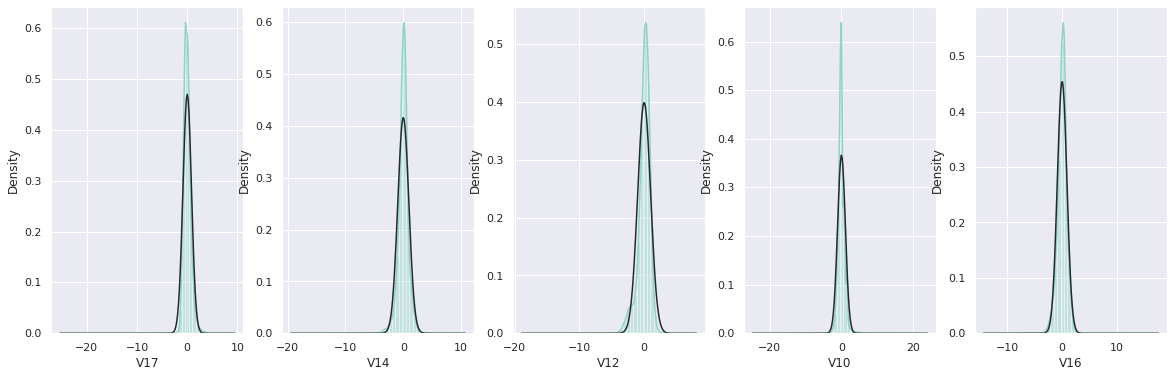

In [107]:
from scipy.stats import norm

sns.set_palette("Set3")
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 6))
sns.distplot(df['V17'],ax=ax1, fit=norm)
sns.distplot(df['V14'],ax=ax2, fit=norm)
sns.distplot(df['V12'],ax=ax3, fit=norm)
sns.distplot(df['V10'],ax=ax4, fit=norm)
sns.distplot(df['V16'],ax=ax5, fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

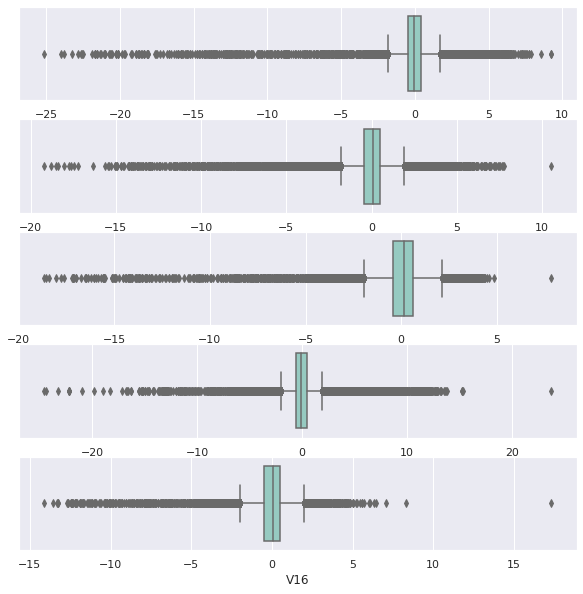

In [108]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(df['V17'],ax=ax1)
sns.boxplot(df['V14'],ax=ax2)
sns.boxplot(df['V12'],ax=ax3)
sns.boxplot(df['V10'],ax=ax4)
sns.boxplot(df['V16'],ax=ax5)

In [109]:
features = ['V17','V14','V12','V16','V10']
new_df_cap = df.copy()


for cols in features:
    upper_limit = new_df_cap[features].mean() + 3*new_df_cap[features].std()
    lower_limit = new_df_cap[features].mean() - 3*new_df_cap[features].std()
    new_df_cap[new_df_cap[features] > upper_limit]
    new_df_cap[new_df_cap[features] < lower_limit]
    new_df_cap[features] = np.where(
        new_df_cap[features] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[features] < lower_limit,
            lower_limit,
            new_df_cap[features]
        )
    )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

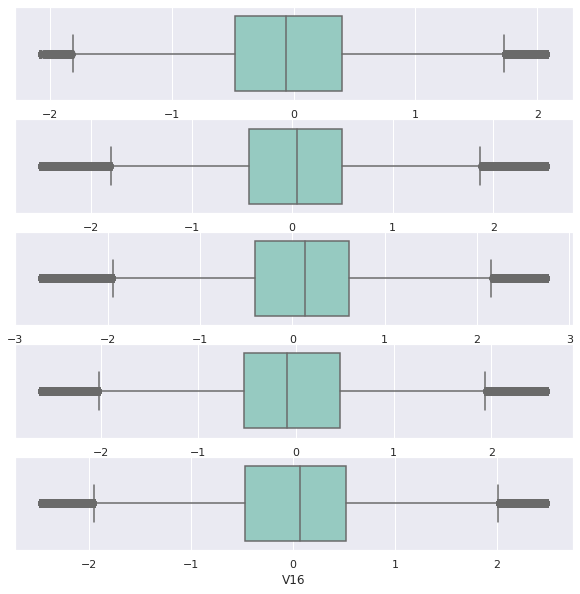

In [110]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10, 10))
sns.boxplot(new_df_cap['V17'],ax=ax1)
sns.boxplot(new_df_cap['V14'],ax=ax2)
sns.boxplot(new_df_cap['V12'],ax=ax3)
sns.boxplot(new_df_cap['V10'],ax=ax4)
sns.boxplot(new_df_cap['V16'],ax=ax5)

##Data Preprocessing


In [111]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [112]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

In [113]:
#time is not required in the classification
df = df.drop("Time", axis=1)

In [114]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [115]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

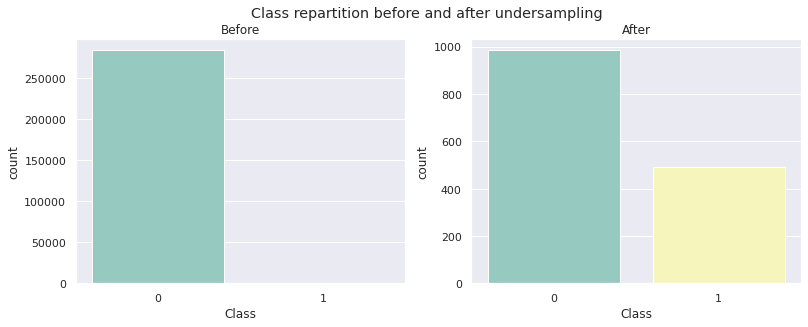

In [116]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [117]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'std_Amount'],
      dtype='object')

In [118]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Random subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
60569,1.273938,0.478197,-0.119570,1.111324,0.011281,-1.200117,0.536442,-0.341350,-0.239649,0.052456,...,0.000883,0.044677,-0.143349,0.399474,0.843260,-0.295746,-0.009903,0.010659,0,-0.341035
149577,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,-3.376177,...,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1,-0.349231
196490,0.028057,1.116388,-0.443852,-0.566534,0.938966,-0.818167,0.981108,-0.160865,-0.017958,-0.731146,...,-0.323074,-0.817332,0.102318,0.565383,-0.418740,0.100200,0.088233,0.082259,0,-0.345273
172787,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,-4.820779,...,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1,0.224974
249239,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1,4.032631


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


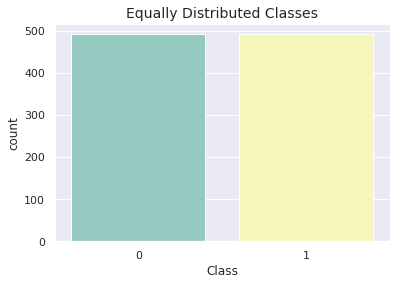

In [119]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [120]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [121]:
new_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.345626,1.805819,-3.507150,2.199308,-1.598275,-0.797435,-2.776458,0.282658,-1.325674,-2.820956,...,0.337815,0.007784,-0.019553,-0.058849,0.022817,0.021760,0.076256,0.043555,0.500000,0.041115
std,5.518483,3.655094,6.221174,3.236264,4.172730,1.614316,5.843324,4.850618,2.317283,4.543459,...,2.782251,1.177348,1.161227,0.556458,0.665403,0.483327,1.024264,0.422054,0.500254,0.858673
min,-30.552380,-8.402154,-31.103685,-4.490378,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.407025,-4.781606,-1.266763,-7.263482,-1.869290,0.000000,-0.353229
25%,-2.836010,-0.208128,-5.084967,-0.259658,-1.775001,-1.559879,-3.060742,-0.210174,-2.347315,-4.572043,...,-0.175784,-0.561582,-0.240101,-0.398608,-0.298592,-0.296042,-0.064045,-0.061880,0.000000,-0.348512
50%,-0.791054,0.948586,-1.377928,1.277226,-0.451033,-0.683399,-0.662084,0.122516,-0.774915,-0.891252,...,0.137876,0.033940,-0.031205,-0.014090,0.049648,-0.021326,0.052949,0.032048,0.500000,-0.284442
75%,1.064301,2.765175,0.315681,4.184137,0.460612,-0.100989,0.288414,0.832193,0.135707,0.057742,...,0.641307,0.586743,0.192683,0.360436,0.388299,0.287511,0.428879,0.212914,1.000000,0.046539
max,2.321360,22.057729,3.363815,12.114672,11.095089,6.474115,5.802537,20.007208,5.072639,8.404971,...,27.202839,8.361985,5.466230,1.129290,2.208209,2.745261,3.052358,3.350929,1.000000,8.146182


In [122]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
class_0 = new_df.loc[new_df['Class'] == 0]["std_Amount"]
class_1 = new_df.loc[new_df['Class'] == 1]["std_Amount"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Density Plot', xaxis=dict(title='Standard Amount'))
iplot(fig, filename='dist_only')

##Model XGBoost

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [124]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [125]:
model = XGBClassifier(random_state=2)
xgb = model.fit(X_train, y_train)

In [126]:
y_pred_xgb = model.predict(X_test) 

In [127]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

Accuracy XGB: 0.9459459459459459
Precision XGB: 0.96
Recall XGB: 0.8888888888888888
F1 Score XGB: 0.923076923076923


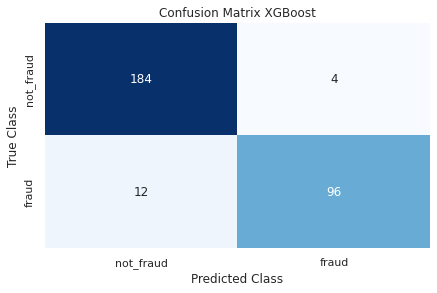

In [128]:
#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [129]:
#AUC
y_pred_xgb_proba = model.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.977098108747045


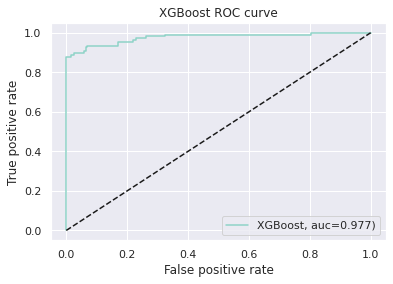

In [130]:
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

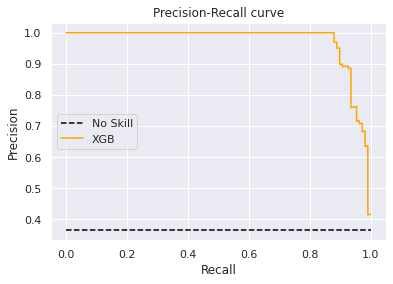

In [131]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

##Model Catboost

In [132]:
!pip3 install catboost

     |████████████████████████████████| 76.1 MB 52 kB/s 


In [133]:
from catboost import CatBoostClassifier

model2 = CatBoostClassifier()
cat_boost = model2.fit(X_train, y_train)

Learning rate set to 0.011057
0:	learn: 0.6757219	total: 58.1ms	remaining: 58s
1:	learn: 0.6584110	total: 66.9ms	remaining: 33.4s
2:	learn: 0.6419618	total: 75.1ms	remaining: 25s
3:	learn: 0.6268804	total: 83.6ms	remaining: 20.8s
4:	learn: 0.6132988	total: 92ms	remaining: 18.3s
5:	learn: 0.6002573	total: 101ms	remaining: 16.7s
6:	learn: 0.5868101	total: 109ms	remaining: 15.5s
7:	learn: 0.5720603	total: 117ms	remaining: 14.5s
8:	learn: 0.5597049	total: 126ms	remaining: 13.8s
9:	learn: 0.5478040	total: 134ms	remaining: 13.3s
10:	learn: 0.5346924	total: 143ms	remaining: 12.9s
11:	learn: 0.5205968	total: 152ms	remaining: 12.5s
12:	learn: 0.5103240	total: 160ms	remaining: 12.1s
13:	learn: 0.4986296	total: 168ms	remaining: 11.9s
14:	learn: 0.4875160	total: 177ms	remaining: 11.6s
15:	learn: 0.4779540	total: 186ms	remaining: 11.4s
16:	learn: 0.4659637	total: 199ms	remaining: 11.5s
17:	learn: 0.4567201	total: 209ms	remaining: 11.4s
18:	learn: 0.4482145	total: 227ms	remaining: 11.7s
19:	learn: 0

In [134]:
y_pred_cat = model2.predict(X_test) 

In [135]:
#scores
print("Accuracy Catboost:",metrics.accuracy_score(y_test, y_pred_cat))
print("Precision Catboost:",metrics.precision_score(y_test, y_pred_cat))
print("Recall Catboost:",metrics.recall_score(y_test, y_pred_cat))
print("F1 Score Catboost:",metrics.f1_score(y_test, y_pred_cat))

Accuracy Catboost: 0.9527027027027027
Precision Catboost: 0.97
Recall Catboost: 0.8981481481481481
F1 Score Catboost: 0.9326923076923077


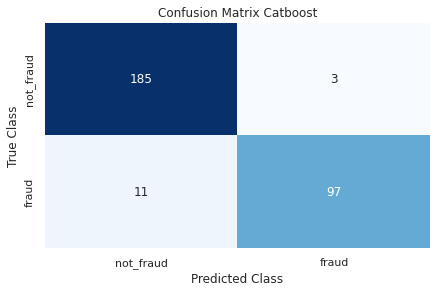

In [136]:
#CM matrix
matrix_cat = confusion_matrix(y_test, y_pred_cat)
cm_cat = pd.DataFrame(matrix_cat, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_cat, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Catboost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [137]:
#AUC
y_pred_cat_proba = model2.predict_proba(X_test)[::,1]
fpr_cat, tpr_cat, _ = metrics.roc_curve(y_test,  y_pred_cat_proba)
auc_cat = metrics.roc_auc_score(y_test, y_pred_cat_proba)
print("AUC Catboost :", auc_cat)

AUC Catboost : 0.9783293932230103


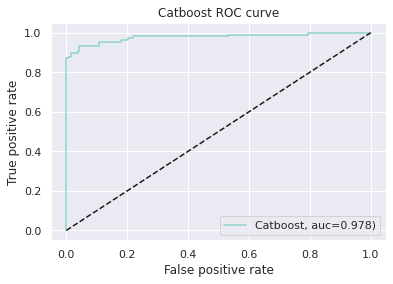

In [138]:
#ROC
plt.plot(fpr_cat,tpr_cat,label="Catboost, auc={:.3f})".format(auc_cat))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Catboost ROC curve')
plt.legend(loc=4)
plt.show()

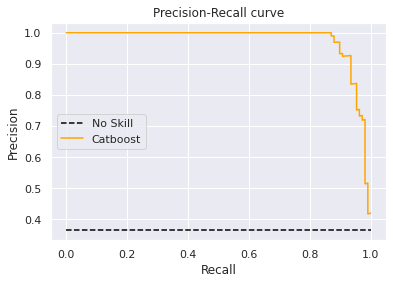

In [139]:
cat_precision, cat_recall, _ = precision_recall_curve(y_test, y_pred_cat_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(cat_recall, cat_precision, color='orange', label='Catboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

##LigthGBM

In [140]:
from lightgbm import LGBMClassifier

model3 = LGBMClassifier()
lgbm_clf = model3.fit(X_train, y_train)

In [141]:
y_pred_lgbm = model3.predict(X_test) 

In [142]:
#scores
print("Accuracy lgbm:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision lgbm:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall lgbm:",metrics.recall_score(y_test, y_pred_lgbm))
print("F1 Score lgbm:",metrics.f1_score(y_test, y_pred_lgbm))

Accuracy lgbm: 0.9425675675675675
Precision lgbm: 0.9595959595959596
Recall lgbm: 0.8796296296296297
F1 Score lgbm: 0.9178743961352657


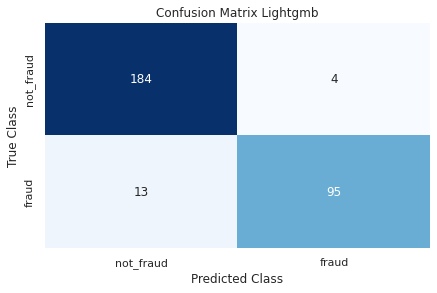

In [143]:
#CM matrix
matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_lgbm = pd.DataFrame(matrix_lgbm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lgbm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Lightgmb"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [144]:
#AUC
y_pred_lgbm_proba = model3.predict_proba(X_test)[::,1]
fpr_lgbm, tpr_lgbm, _ = metrics.roc_curve(y_test,  y_pred_lgbm_proba)
auc_lgbm = metrics.roc_auc_score(y_test, y_pred_lgbm_proba)
print("AUC Ligthgbm :", auc_lgbm)

AUC Ligthgbm : 0.9805949566587865


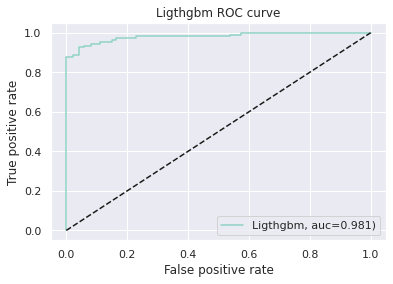

In [145]:
#ROC
plt.plot(fpr_lgbm,tpr_lgbm,label="Ligthgbm, auc={:.3f})".format(auc_lgbm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Ligthgbm ROC curve')
plt.legend(loc=4)
plt.show()

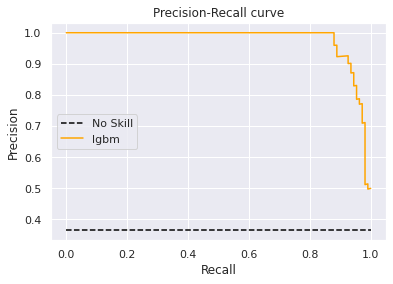

In [146]:
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, y_pred_lgbm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(lgbm_recall, lgbm_precision, color='orange', label='lgbm')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

##MLP Classification

In [147]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model4.fit(X_train, y_train)

In [148]:
model4.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [149]:
y_pred_mlp = model4.predict(X_test)

In [150]:
#scores
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9493243243243243
Precision MLP: 0.9345794392523364
Recall MLP: 0.9259259259259259
F1 Score MLP: 0.9302325581395349


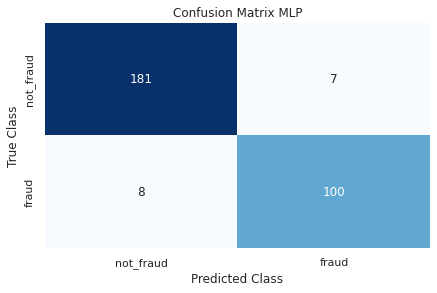

In [151]:
#CM matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [152]:
#AUC
y_pred_mlp_proba = model4.predict_proba(X_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9792651694247438


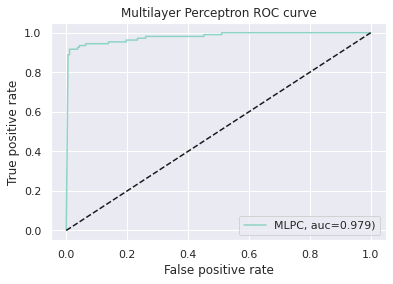

In [153]:
#ROC
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

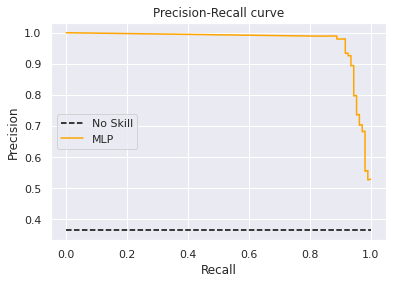

In [154]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_mlp_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(mlp_recall, mlp_precision, color='orange', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

##Linear Regression, KNN and Random Forest

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [162]:
model_lr = LogisticRegression(solver='liblinear').fit(X_under, Y_under)
model_knn = KNeighborsClassifier( weights='distance').fit(X_under, Y_under)
model_rf = RandomForestClassifier(oob_score=True, 
                            random_state=42,
                            n_jobs=-1).fit(X_under, Y_under)

**Linear Regression**

In [163]:
lr = model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test) 

In [164]:
print("Accuracy lr:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision lr:",metrics.precision_score(y_test, y_pred_lr))
print("Recall lr:",metrics.recall_score(y_test, y_pred_lr))
print("F1 Score lr:",metrics.f1_score(y_test, y_pred_lr))

Accuracy lr: 0.9425675675675675
Precision lr: 0.9595959595959596
Recall lr: 0.8796296296296297
F1 Score lr: 0.9178743961352657


In [165]:
#AUC
y_pred_lr_proba = model_lr.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_lr_proba)
auc_lr = metrics.roc_auc_score(y_test, y_pred_lr_proba)
print("AUC Linear Regression :", auc_lr)

AUC Linear Regression : 0.9708924349881797


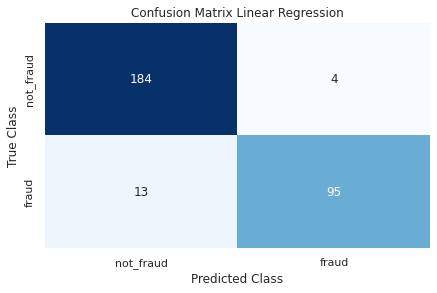

In [166]:
matrix_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr = pd.DataFrame(matrix_lr, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lr, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Linear Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**KNN**

In [167]:
knn = model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test) 

In [168]:
print("Accuracy knn:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision knn:",metrics.precision_score(y_test, y_pred_knn))
print("Recall knn:",metrics.recall_score(y_test, y_pred_knn))
print("F1 Score knn:",metrics.f1_score(y_test, y_pred_knn))

Accuracy knn: 0.9425675675675675
Precision knn: 0.9595959595959596
Recall knn: 0.8796296296296297
F1 Score knn: 0.9178743961352657


In [169]:
#AUC
y_pred_knn_proba = model_knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
print("AUC KNN :", auc_knn)

AUC KNN : 0.979363672182821


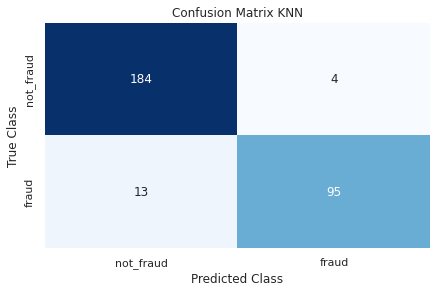

In [170]:
matrix_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn = pd.DataFrame(matrix_knn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_knn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix KNN"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**Random Forest**

In [171]:
rf = model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test) 

In [172]:
print("Accuracy rf:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision rf:",metrics.precision_score(y_test, y_pred_rf))
print("Recall rf:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score rf:",metrics.f1_score(y_test, y_pred_rf))

Accuracy rf: 0.9459459459459459
Precision rf: 0.9693877551020408
Recall rf: 0.8796296296296297
F1 Score rf: 0.9223300970873787


In [173]:
#AUC
y_pred_rf_proba = model_rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9717789598108748


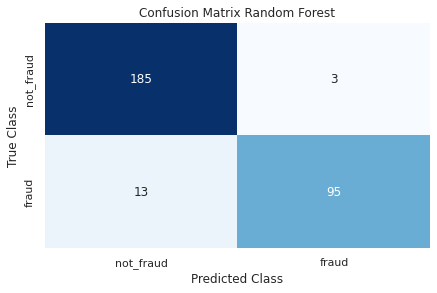

In [174]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Random Forest"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

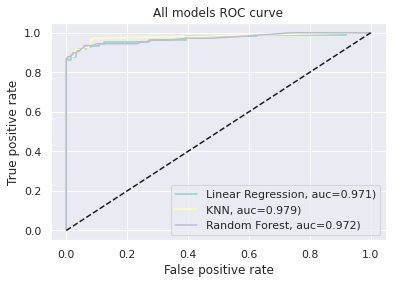

In [175]:
plt.plot(fpr_lr,tpr_lr,label="Linear Regression, auc={:.3f})".format(auc_lr))
plt.plot(fpr_knn,tpr_knn,label="KNN, auc={:.3f})".format(auc_knn))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('All models ROC curve')
plt.legend(loc=4)
plt.show()

## All models ROC Curve

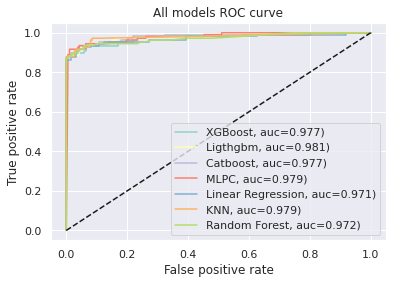

In [176]:
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot(fpr_lgbm,tpr_lgbm,label="Ligthgbm, auc={:.3f})".format(auc_lgbm))
plt.plot(fpr_cat,tpr_cat,label="Catboost, auc={:.3f})".format(auc_xgb))
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot(fpr_lr,tpr_lr,label="Linear Regression, auc={:.3f})".format(auc_lr))
plt.plot(fpr_knn,tpr_knn,label="KNN, auc={:.3f})".format(auc_knn))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('All models ROC curve')
plt.legend(loc=4)
plt.show()

##Unsupervised PCA

In [181]:
df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')

In [182]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [183]:
# Separate the samples by class
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

In [185]:
legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [186]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

In [187]:
legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

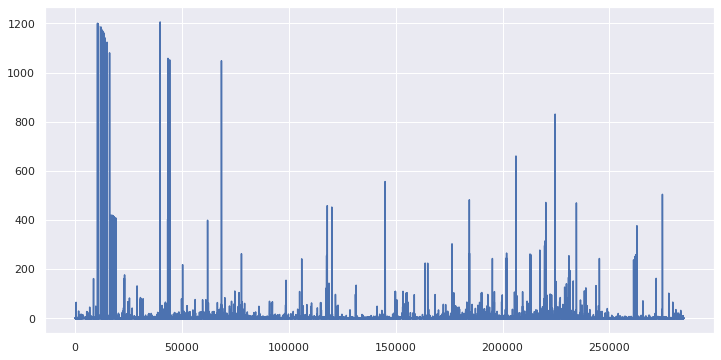

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

legit_scores.plot(figsize = (12, 6))

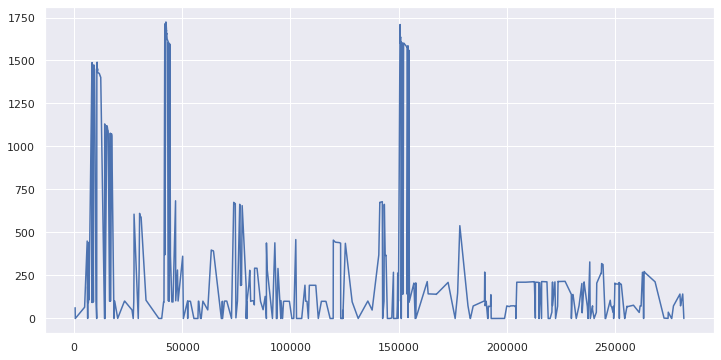

In [189]:
fraud_scores.plot(figsize = (12, 6))

Text(89.18, 0.5, 'True label')

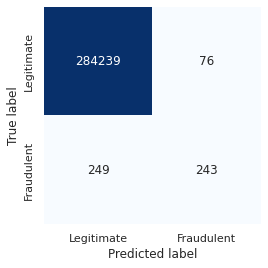

In [190]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')